In [ ]:
import networkx as nx
import itertools as it
import matplotlib.pyplot as plt

def cswap(pair,i):
  a,b = pair
  if i == '0':
    return (a,b)
  elif i == '1':
    return (b,a)
  else:
    raise ValueError

def binary(m):
  binary = []
  for i in range(2**m):
    binary.append(str(bin(i)[2:].zfill(m)))
  return binary

def iterateEdges(n):
  edges = []
  tournament = list(it.combinations(range(n),2))
  binar = binary(len(tournament))
  for b in binar:
    newtourn = []
    for t in range(len(tournament)):
      newtourn.append(cswap(tournament[t],b[t]))
    edges.append(newtourn)
  return edges

def createTournament(n,edges):
  T = nx.DiGraph()
  T.add_edges_from(edges)
  return T

In [ ]:
from networkx.drawing.layout import circular_layout
n = 5

iterEdges = iterateEdges(n)
print("Todos los torneos:",iterEdges)
Gtournaments = [createTournament(n,iterEdges.pop())]

for edges in iterEdges:
  new = createTournament(n,edges)
  isNew = True
  for old in Gtournaments:
    if nx.is_isomorphic(old,new):
      isNew = False
      break
  if isNew:
    Gtournaments.append(new)

print("Found",len(Gtournaments),"graphs.")

Todos los torneos: [[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)], [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (4, 3)], [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (4, 2), (3, 4)], [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (4, 2), (4, 3)], [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (3, 2), (2, 4), (3, 4)], [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (3, 2), (2, 4), (4, 3)], [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (3, 2), (4, 2), (3, 4)], [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (3, 2), (4, 2), (4, 3)], [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (4, 1), (2, 3), (2, 4), (3, 4)], [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (4, 1), (2, 3), (2, 4), (4, 3)], [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (4, 1), (2, 3), (4, 2), (3, 4)], [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (4, 1), (2, 3), (4, 2), (4, 3

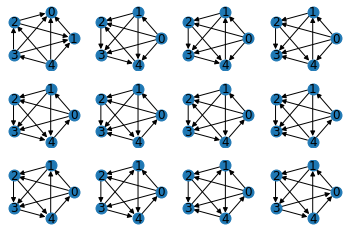

In [ ]:
for i in range(12):
  plt.subplot(3,4,i+1)
  nx.draw_circular(Gtournaments[i], with_labels=True, node_size=120)

False

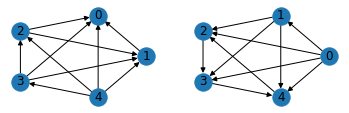

In [ ]:
E1 = [(1,5),(1,3),(1,4),(2,1),(2,5),(2,3),(3,4),(4,2),(5,3),(5,4)]
E2 = [(1,5),(1,4),(1,3),(2,1),(2,5),(2,3),(3,5),(4,2),(4,3),(5,4)]
G1 = createTournament(6,E1)
G2 = createTournament(6,E2)
plt.subplot(221)
nx.draw_circular(Gtournaments[0], with_labels=True)
plt.subplot(222)
nx.draw_circular(Gtournaments[1], with_labels=True)
nx.is_isomorphic(G1,G2)